## Decision Tree (Growing Tree)

### Decision Trees don’t require feature scaling or centering at all.
* #### Scikit-Learn uses the CART algorithm, which produces only binary trees. However, other algorithms such as ID3 can produce Decision Trees with nodes that have more than two children.
* #### Decision Tree is a white-box model, which is intuitive and simple.
* #### Random Forest andNeural Network are Black-box model which gives great prediction, in-depth caliculation but understand and reasoning why a feature is selected is hard.
* #### gini impurity -> faster computation
* #### entropy -> more balanced trees

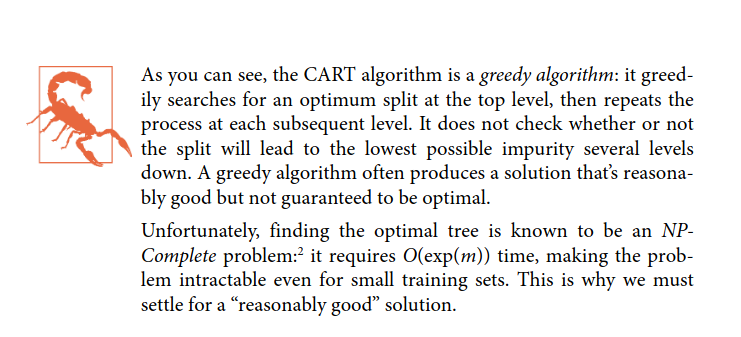

### Working of Decision Tree in Simple
#### The CART algorithm works by first splitting the training set into two subsets using a single feature k and a threshold t (e.g., “petal length ≤ 2.45 cm”). How does it choose k and tk? It searches for the pair (k, tk) that produces the purest subsets (weighted by their size). 
##### Below eqn gives the cost function that the algorithm tries to minimize.
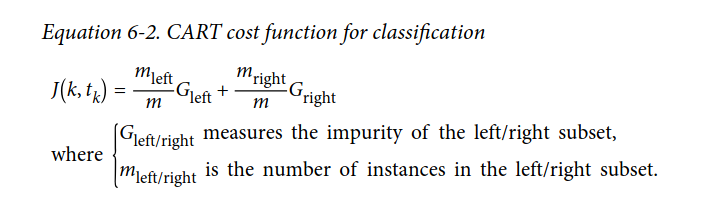

### Time complexity of Decision Tree
* #### Binary Balanced Trees / CAST Algo - O(log2(m))
* #### Compares all features (or max_features m ) on all samples n at each node - O(n × m log2(m))
* #### Small training sets (<= few 1000 instances), Speed up training by presorting the data (set presort=True), but slows down training for larger training sets.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [2]:
from sklearn.tree import  export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [3]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[6, 1.5]]) # versicolor

array([1])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### To view decision tree model data 

In [7]:
# %sudo apt install graphviz

# %dot -Tpng iris_tree.dot -o iris_tree.png

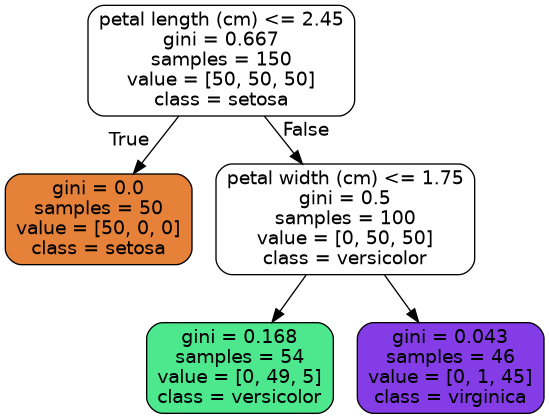

### Regularization - Restricting model's degree of freedom during Training

#### Decision Tree is non-parametric model(no. of params is not determined prior to training, model structure sticks closely to the data), which results in overfitting
#### Parametric models like Linear Regression assume  data is linear, having predetermined params or features, results in underfitting. 
* #### to avoid overfitting  -> Regularization
* #### to avoid underfitting -> Optimization

#### In Decision Tree, params - min_samples_leaf, min_samples_leaf, max_samples_leaf, etc are used

### Other Way
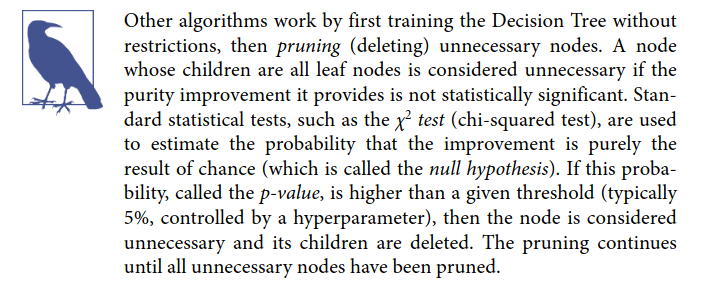

### Regression
#### CART Algo works same as before but, now it tries to reduce mse instead of impurity
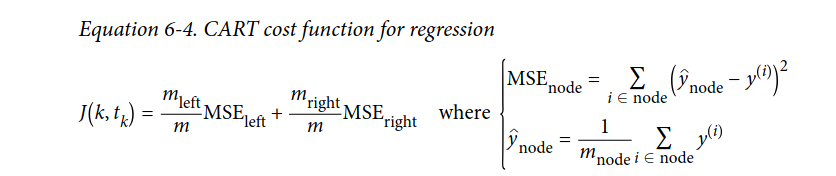

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

In [17]:
export_graphviz?

Signature:
export_graphviz(
    decision_tree,
    out_file=None,
    *,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    leaves_parallel=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate=False,
    rounded=False,
    special_characters=False,
    precision=3,
    fontname='helvetica',
)
Docstring:
Export a decision tree in DOT format.

This function generates a GraphViz representation of the decision tree,
which is then written into `out_file`. Once exported, graphical renderings
can be generated using, for example::

    $ dot -Tps tree.dot -o tree.ps      (PostScript format)
    $ dot -Tpng tree.dot -o tree.png    (PNG format)

The sample counts that are shown are weighted with any sample_weights that
might be present.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
decision_tree : object
    The decision tree estimator to be exported to GraphViz.

out_file : object or str, defaul

In [20]:
export_graphviz(
    tree_reg,
    out_file="iris_reg_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True, 
    max_depth=3
)

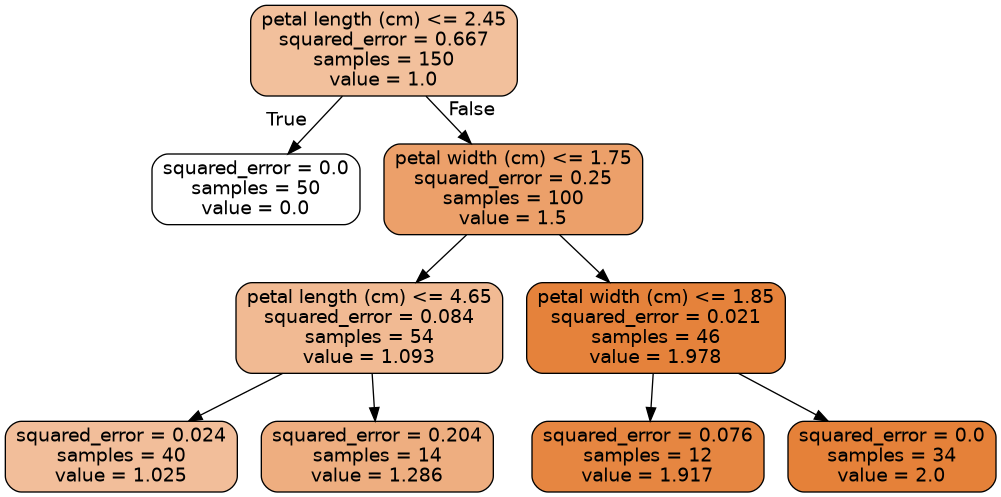

In [ ]:
# from IPython.display import Image

# # get the image
# Image(url="file:///home/krrish/Desktop/jp-notebook/ml-books/proj2/iris_reg_tree.png", width=300, height=300)

### Limitation of Decision Tree model

* #### Since, it is a stochastic model, it gives different result even on same training data(unless random_state is set)
* #### Since it does orthogonal splits, it is sensitive to small variation in training data
* 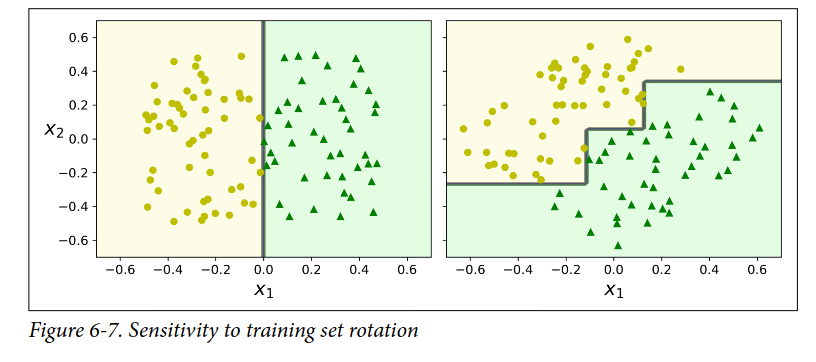